# 1)Download the dataset 
# 2) Import the modules and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/admin/Downloads/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# 3) Visualizations

# Univariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

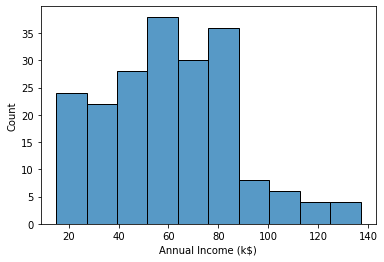

In [7]:
sns.histplot(df['Annual Income (k$)'])

In [9]:
import warnings

In [10]:
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Annual Income (k$)'>

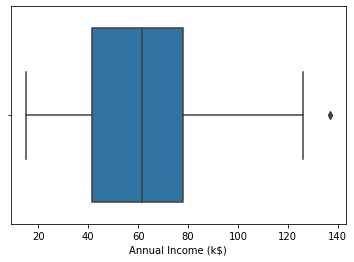

In [11]:
sns.boxplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

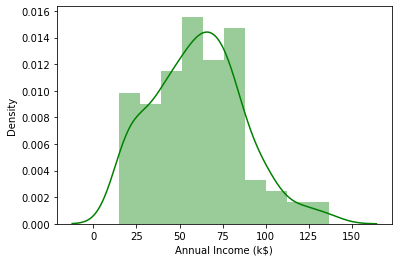

In [12]:
sns.distplot(df['Annual Income (k$)'],color="green")

## Bi-variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

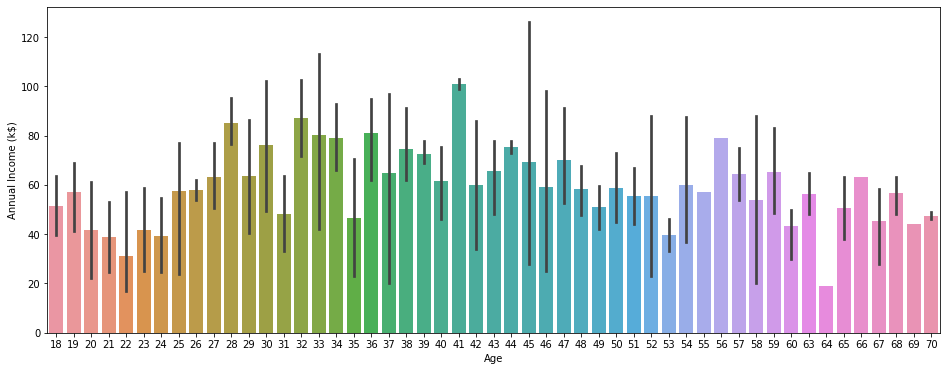

In [15]:
plt.figure(figsize=(16,6))
sns.barplot(df['Age'],df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

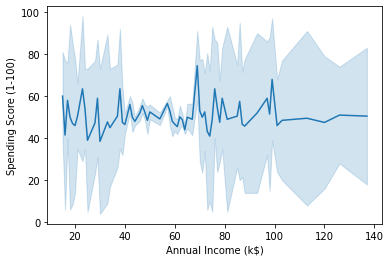

In [16]:
sns.lineplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

## Age vs Spending Score

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

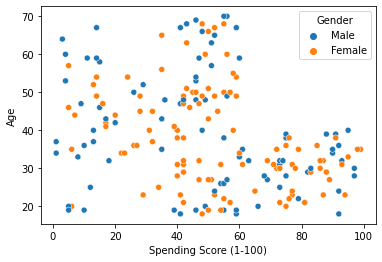

In [17]:
sns.scatterplot(df['Spending Score (1-100)'],df['Age'],hue=df['Gender'])

# Gender vs Age Distribution

(-0.5, 1.5, 0.0, 100.0)

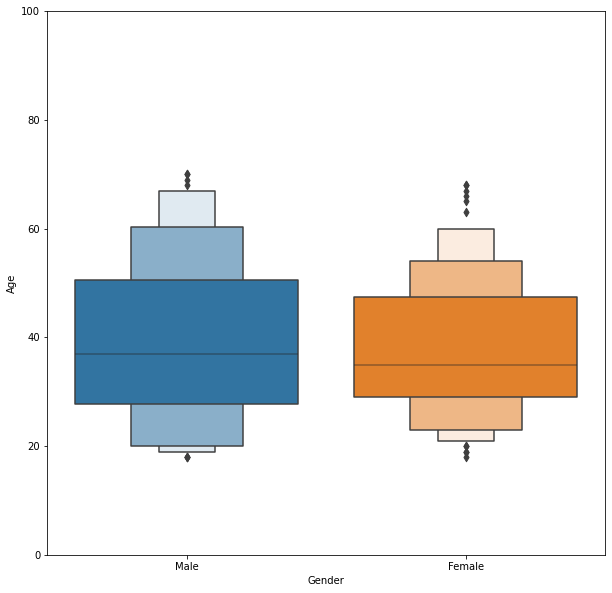

In [19]:
temp=pd.concat([df['Age'],df['Gender']],axis=1)
f,ax=plt.subplots(figsize=(10,10))
fig=sns.boxenplot(x='Gender',y='Age',data=df)
fig.axis(ymin=0,ymax=100)

# Annual Income cs Gender Countplot

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

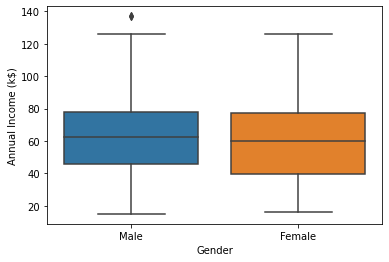

In [20]:
sns.boxplot(x=df['Gender'],y=df['Annual Income (k$)'])

# Multi-variant Analysis

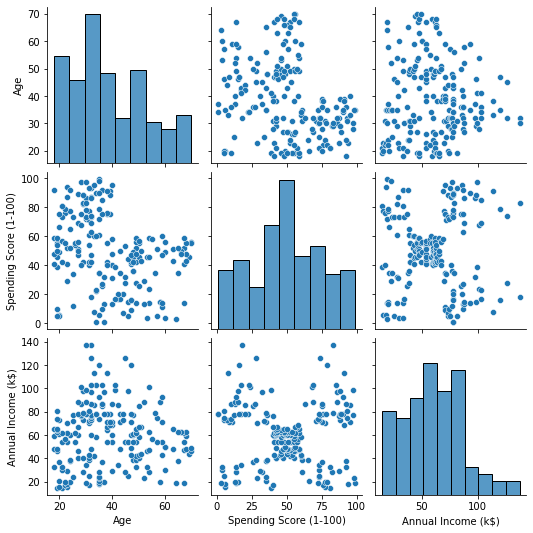

In [21]:
sns.pairplot(data=df[["Age","Gender","Spending Score (1-100)","Annual Income (k$)"]])

# Correlation Between Different Attributes

<AxesSubplot:>

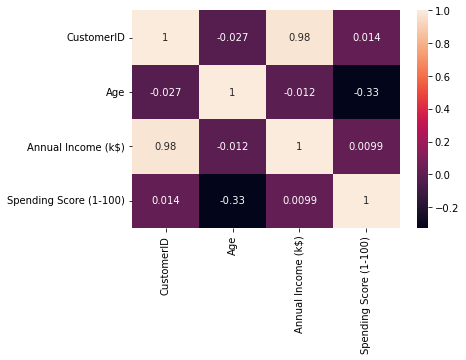

In [22]:
sns.heatmap(df.corr(),annot=True)

# 4) Perform Descriptive Statistics on the dataset

In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [25]:
df.shape

(200, 5)

# 5) Check for Missing Values and Deal with them

In [27]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [29]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# 6) Finding the outliers and replace them

In [30]:
for i in df:
    if df[i].dtype=='int64':
        q1=df[i].quantile(0.25)
        q2=df[i].quantile(0.75)
        iqr=q2-q1
        upper=q2+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i]>upper,upper,df[i])
        df[i]=np.where(df[i]<lower,lower,df[i])

# After revoving outliers, boxplot :

{'whiskers': [<matplotlib.lines.Line2D at 0x203790d9ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x203790de0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x203790d9910>],
 'medians': [<matplotlib.lines.Line2D at 0x203790de640>],
 'fliers': [<matplotlib.lines.Line2D at 0x203790de910>],
 'means': []}

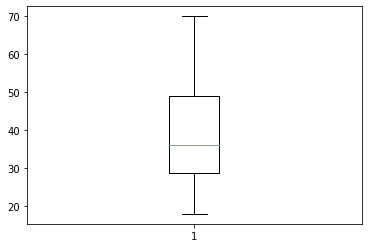

In [32]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2037911e5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2037911eb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x20379114160>],
 'medians': [<matplotlib.lines.Line2D at 0x2037912b160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2037912b430>],
 'means': []}

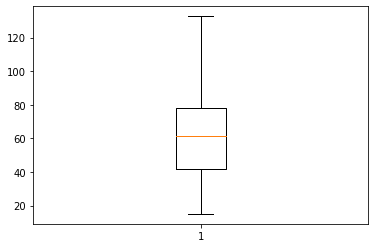

In [33]:
plt.boxplot(df['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x203790c0700>,
 'caps': [<matplotlib.lines.Line2D at 0x203759ca3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x203759bae50>],
 'medians': [<matplotlib.lines.Line2D at 0x203743f7ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203740dc0a0>],
 'means': []}

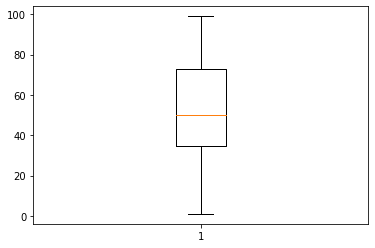

In [34]:
plt.boxplot(df['Spending Score (1-100)'])

# 7) Check for categorical columns and perform encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
l_en=LabelEncoder()

In [36]:
df['Gender']=l_en.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


# 8) Scaling the Data

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

# 9) Perform any of the clustering algorithms

In [39]:
from sklearn.cluster import KMeans

In [40]:
km=KMeans()
res=km.fit_predict(data_scaled)
res

array([5, 5, 4, 4, 4, 4, 2, 4, 7, 4, 7, 4, 2, 4, 1, 5, 4, 5, 7, 4, 5, 5,
       2, 5, 2, 5, 2, 5, 2, 4, 7, 4, 7, 5, 2, 4, 2, 4, 2, 4, 2, 5, 7, 4,
       2, 4, 2, 4, 4, 4, 2, 5, 4, 7, 2, 7, 2, 7, 4, 7, 7, 5, 2, 2, 7, 5,
       2, 2, 5, 4, 7, 2, 2, 2, 7, 5, 2, 5, 4, 2, 7, 5, 7, 2, 4, 7, 2, 4,
       4, 2, 2, 5, 7, 2, 4, 5, 2, 4, 7, 5, 4, 2, 7, 5, 7, 4, 2, 7, 7, 7,
       7, 4, 2, 5, 4, 4, 2, 2, 2, 2, 5, 2, 0, 3, 4, 0, 1, 3, 7, 3, 1, 3,
       4, 0, 1, 0, 6, 3, 1, 0, 6, 3, 4, 0, 1, 3, 1, 0, 6, 3, 1, 3, 6, 0,
       6, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 6, 3, 1, 3, 1, 3, 6, 0,
       1, 3, 1, 3, 6, 0, 1, 0, 6, 3, 6, 3, 6, 0, 6, 0, 1, 0, 6, 0, 6, 3,
       1, 3])

In [41]:
data1=pd.DataFrame(data_scaled,columns=df.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [42]:
data1['kclus']=pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,5
1,1.0,0.057692,0.000000,0.816327,5
2,0.0,0.038462,0.008493,0.051020,4
3,0.0,0.096154,0.008493,0.775510,4
4,0.0,0.250000,0.016985,0.397959,4


In [43]:
data1['kclus'].unique()

array([5, 4, 2, 7, 1, 0, 3, 6])

In [44]:
data1['kclus'].value_counts()

2    39
4    37
7    26
5    24
0    22
1    20
3    18
6    14
Name: kclus, dtype: int64

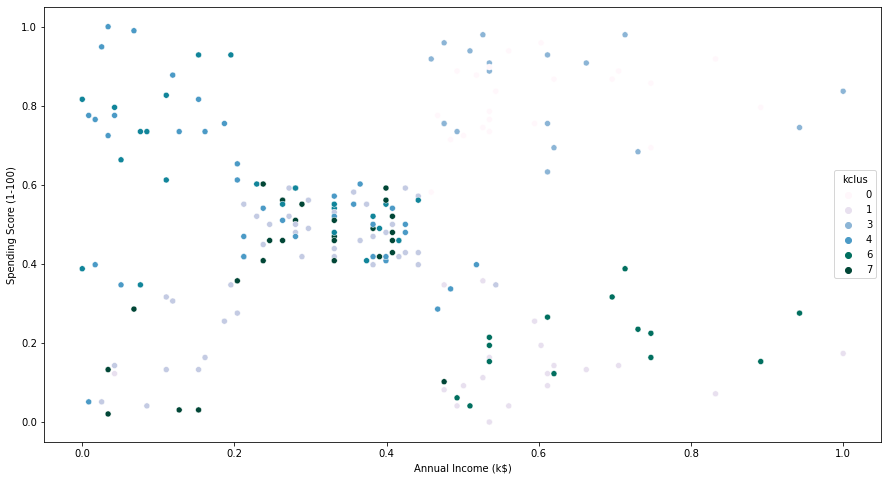

In [45]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],y=data1['Spending Score (1-100)'],hue=data1['kclus'],palette='PuBuGn')
plt.show()

In [46]:
ind=data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [47]:
dep=data1.iloc[:,4:]
dep.head()

,kclus
0,5
1,5
2,4
3,4
4,4


# Split the data into training and testing

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [49]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [50]:
y_train.head()

,kclus
116,2
67,2
78,4
42,7
17,5


In [51]:
y_test.head()

,kclus
58,4
40,2
34,2
102,7
184,6


In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
pred_test=lr.predict(x_test)
pred_test[0:5]

array([[2.87231042],
       [3.85464182],
       [3.99652616],
       [4.53080438],
       [1.61038988]])

# Measure the Performance using Evaluation Metrics

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse=mean_squared_error(pred_test,y_test)
print("Mean Squared error is: ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared error is: ",rmse)
mae=mean_absolute_error(pred_test,y_test)
print("Mean Absolute error is: ",mae)
acc=lr.score(x_test,y_test)
print("Accuracy is: ",acc)

Mean Squared error is:  3.8870820036404328
Root Mean Squared error is:  1.9715684121126593
Mean Absolute error is:  1.6013539391225584
Accuracy is:  0.1262802689119904
